## Importing necessary library

In [2]:
import pandas as pd
import  numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

## Reading Concrete Data

In [130]:
 # [Concrete_Data, Housing, Student_Marks, Ice Cream Sales - temperatures, Student_Performance, advertising, Admission_Predict, 
 #  Cellphone, House_Rent_Dataset]
df = pd.read_csv('dataset/Cellphone.csv')
ref = df[:3]
newformat = {}
df.head()

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
0,203,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4,2357
1,880,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,1749
2,40,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6,1916
3,99,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0,1315
4,880,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,1749


## Box plot, Density graph

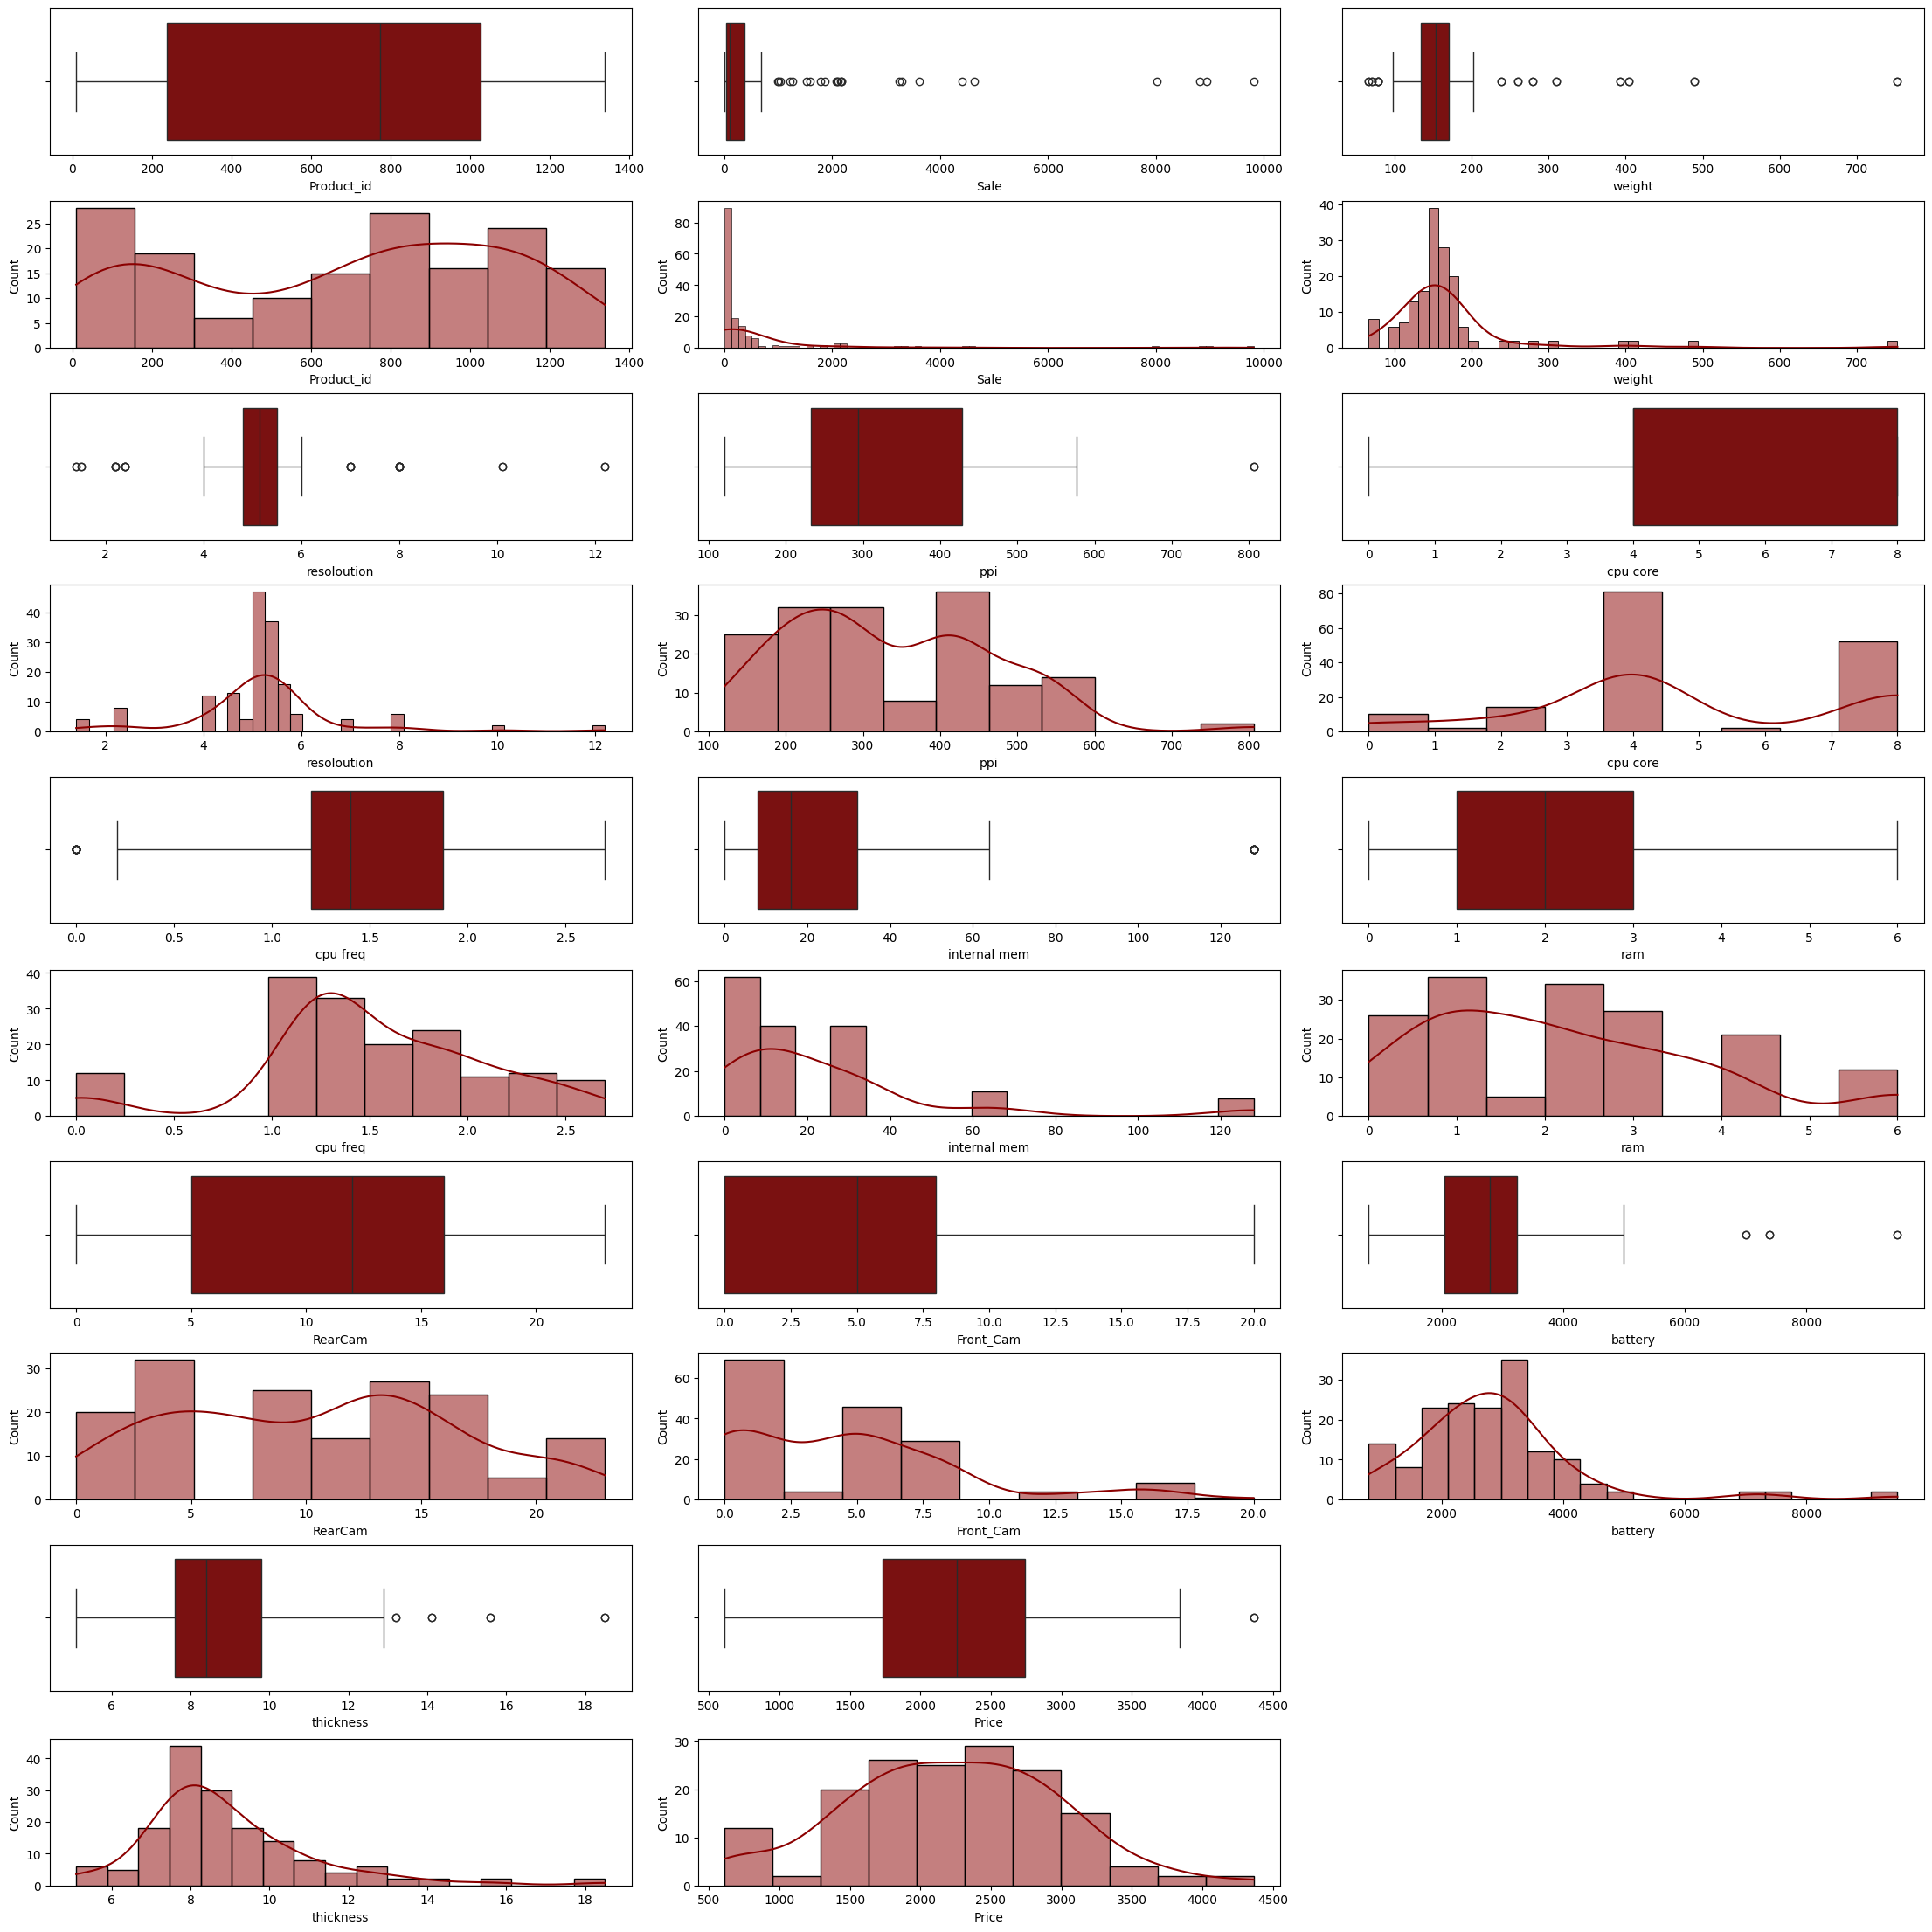

In [131]:
from math import ceil

wd = 22
hi = 22

if(df.shape[1] <= 3):
    wd = 10
    hi = 5

fig = plt.figure(figsize=(wd, hi), layout='constrained')
drawbox, indexbox = 1, 0
drawhist, indexhist = 4, 0
n = len(df.columns)
rows = (ceil(df.shape[1]/3))*2

while(indexbox < n):
    for i in range(3):
        if(indexbox < n):
            fig.add_subplot(rows, 3, drawbox)
            sns.boxplot(x=df.iloc[:, indexbox], color='darkred')
        drawbox += 1
        indexbox += 1
    drawhist = drawbox
    
    for i in range(3):
        if(indexhist < n):
            fig.add_subplot(rows, 3, drawhist)
            sns.histplot(x=df.iloc[:,indexhist], kde=True, color='darkred')
        drawhist += 1
        indexhist += 1
    drawbox = drawhist


## Converting string values into int

In [132]:
def value_map(x, valuemap):
    for key, value in valuemap.items():
        if(x == key):
            return value

for col in df:
    values = df[col].unique()
    if(type(values[0]) == str):
        valuemap = {}
        for num, val in enumerate(values):
            valuemap[val] = num
        print(f"String value found in {col}, converting it into: ")
        print(valuemap, "\n")
        newformat[col] = valuemap
        
        df[col] = df[col].apply(value_map, valuemap = valuemap)

<Axes: >

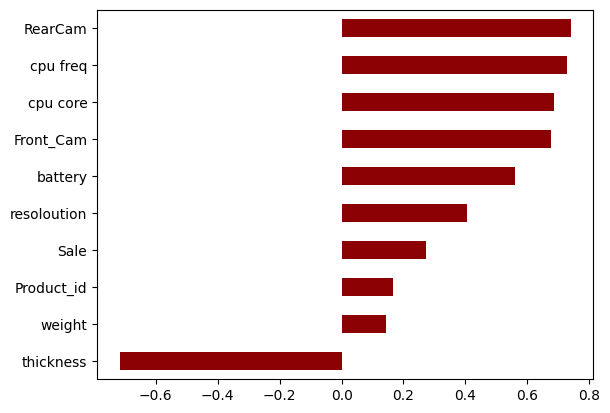

In [133]:
df.corr()[df.columns[-1]].sort_values().head(11)[:-1].plot.barh(color='darkred')

<Axes: >

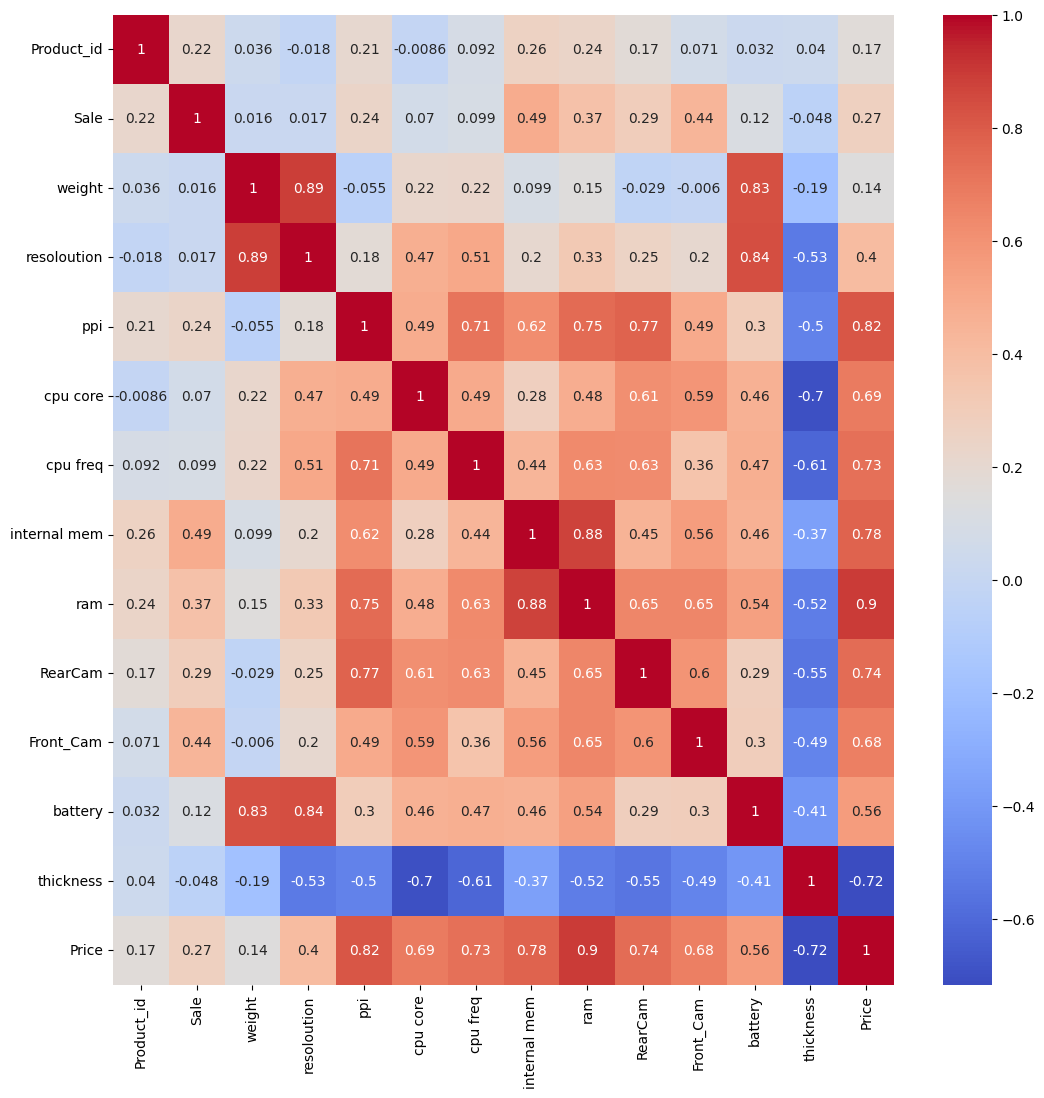

In [134]:
size = df.shape[1]*0.9
fig, ax = plt.subplots(figsize=(size, size))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)

## Spliting into train and test data

In [135]:
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X train size:", X_train.shape)
print("y train size:", y_train.shape)

print("X test size:", X_test.shape)
print("y test size:", y_test.shape)

X train size: (128, 13)
y train size: (128,)
X test size: (33, 13)
y test size: (33,)


## Evaluating models

In [136]:
def eval_metrices(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("MSE:", mse)
    print("SCORE:", score)
    return rmse, mae, mse, score

def crossvalidation(model_name, X_train, y_train, cv=None):
    cv_score = cross_val_score(estimator=model_name, X = X_train, y = y_train, cv=cv)
    return print("Cross Val score:", cv_score.mean())

In [137]:
model_accuracy = {}

In [138]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
ridge_model = Ridge(True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
model_accuracy["Ridge Regression"] = [eval_metrices(y_test, y_pred)[-1], ridge_model]
crossvalidation(ridge_model, X_train, y_train, 3)

RMSE: 165.87573689759898
MAE: 142.08239813363699
MSE: 27514.760091321485
SCORE: 0.9521145175016591
Cross Val score: 0.9382039846122492


In [139]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
model_accuracy["Linear Regression"] = [eval_metrices(y_test, y_pred)[-1], lm]
crossvalidation(lm, X_train, y_train, 3)

RMSE: 164.83910485332035
MAE: 141.19441190426892
MSE: 27171.930488843936
SCORE: 0.952711163115681
Cross Val score: 0.9376263378058879


In [140]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
model_accuracy["Lasso regression"] = [eval_metrices(y_test, y_pred)[-1],lasso_model]
crossvalidation(lm, X_train, y_train, 3)

RMSE: 165.0005257301267
MAE: 141.32296244958894
MSE: 27225.173491218204
SCORE: 0.9526185013279754
Cross Val score: 0.9376263378058879


In [141]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
model_accuracy["XGBoost Regression"] = [eval_metrices(y_test, y_pred)[-1], xgb]
crossvalidation(xgb, X_train, y_train, 3)

RMSE: 46.614812763574434
MAE: 21.165364583333332
MSE: 2172.9407689831023
SCORE: 0.996218309125076
Cross Val score: 0.9020077871690168


In [142]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
model_accuracy["Random Forest Regression"] = [eval_metrices(y_test, y_pred)[-1], rf_reg]
crossvalidation(rf_reg, X_train, y_train, 3)

RMSE: 113.28462232159076
MAE: 86.00666666666669
MSE: 12833.40565454546
SCORE: 0.9776653032835755
Cross Val score: 0.9156671223638573


## Accuracy comparison

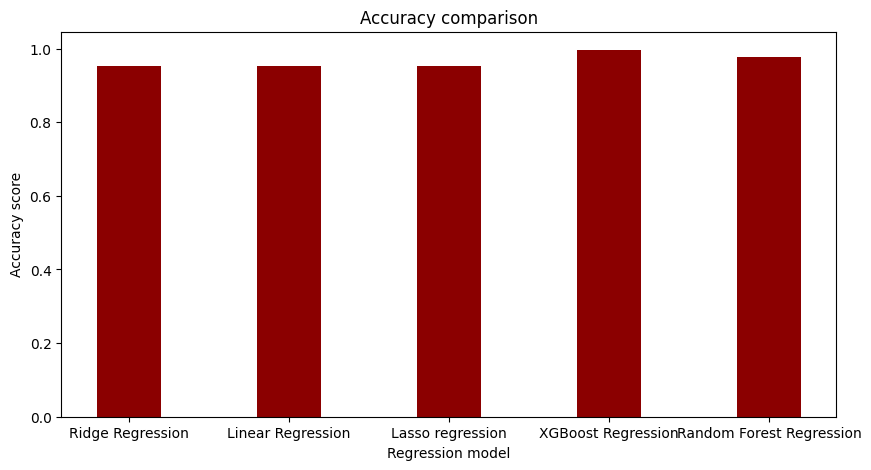

Best performing model: XGBoost Regression 0.996218309125076


In [143]:
fig = plt.figure(figsize = (10, 5))
ma = [] 
for i in model_accuracy.values():
    ma.append(i[0])
plt.bar(model_accuracy.keys(), ma, color = 'darkred', width = 0.4)
plt.xlabel("Regression model")
plt.ylabel("Accuracy score")
plt.title("Accuracy comparison")
plt.show()
bestmodel = None
bestmodelname = ""
bestaccuracy = 0
for key, val in model_accuracy.items():
    if(val[0] > bestaccuracy):
        bestaccuracy = val[0]
        bestmodel = val[1]
        bestmodelname = key
print("Best performing model:", bestmodelname, bestaccuracy)

## Try entering your own data

In [ ]:
print("Referance data:")
print(ref)
data = [[]]
createdf = True
print("press [ENTER] to cancel")
for attri in X_train:
    values = None
    if(attri in newformat):
        values = newformat[attri]
        
    entereddata = input(f"Enter data for {attri}:")
    if(entereddata == ''):
        createdf = False
        break
    if(values and entereddata in values):
        entereddata = values[entereddata]
    data[0].append(float(entereddata))
if(createdf):    
    data = pd.DataFrame(data, columns=X_train.columns)
    print("Choose a model:")
    model = int(input("\t1.linear regression \n\t2.Rigid regression \n\t3.Lasso regression \n\t4.Random forest regression \n\t5.XGboost \n\t6.Best Model \n"))
    models = [lm, ridge_model, lasso_model, rf_reg, xgb, bestmodel]
    if(model >= 6 or model <= 0):
        model = models[5]
    else:
        model = models[model-1]

    print(df.columns[-1], ":", model.predict(data)[0])

Referance data:
   Product_id  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203    10   135.0          5.2  424         8      1.35   
1         880    10   125.0          4.0  233         2      1.30   
2          40    10   110.0          4.7  312         4      1.20   

   internal mem  ram  RearCam  Front_Cam  battery  thickness  Price  
0          16.0  3.0    13.00        8.0     2610        7.4   2357  
1           4.0  1.0     3.15        0.0     1700        9.9   1749  
2           8.0  1.5    13.00        5.0     2000        7.6   1916  
press [ENTER] to cancel


## Ignoring unimportant feature

In [ ]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_}, index=X_train.columns)
feature = importance.sort_values(by="importance", ascending=False)
feature

In [ ]:
i = 0
while i < len(feature):
    if(feature.values[i] < 0.05):
        temp = feature.drop(feature.index[i])
        feature = temp
    else:
        i += 1
feature

In [ ]:
X = df[feature.index]
y = df[df.columns[-1]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train size:", X_train.shape)
print("y train size:", y_train.shape)

print("X test size:", X_test.shape)
print("y test size:", y_test.shape)

In [ ]:
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
eval_metrices(y_test, y_pred)
crossvalidation(rf_reg, X_train, y_train, 3)

In [ ]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
eval_metrices(y_test, y_pred)
crossvalidation(xgb, X_train, y_train, 3)